In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
indv_count = "/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_preview/plink_hg38_qc/qc_indv.count.txt"

In [53]:
with open(indv_count, 'r') as file:
    arrays = []
    for line in file:
        split = line.split()
        print("variants {}, people {}".format(split[0], split[3]))
        line_array = [int(split[0]), int(split[3])]
        #print(line_array)
        # Append the line array to the list
        arrays.append(line_array)
       
# Convert the list of arrays to a NumPy array
counts = np.array(arrays)


variants 335091, people 20769
variants 282840, people 20720
variants 321795, people 20948
variants 345654, people 20951
variants 313458, people 20950
variants 322230, people 20949
variants 354108, people 20951
variants 344082, people 20949
variants 334436, people 20948
variants 350272, people 20951
variants 328768, people 20949
variants 305979, people 20713
variants 356079, people 20949
variants 340755, people 20949
variants 353345, people 20949
variants 329549, people 20900
variants 307062, people 20731
variants 345870, people 20946
variants 332960, people 20948
variants 357987, people 20949
variants 323733, people 20919
variants 327295, people 20949
variants 409046, people 20949
variants 386725, people 20951
variants 354953, people 20758
variants 389363, people 20948
variants 379081, people 20945
variants 353407, people 20913
variants 419011, people 20951
variants 348104, people 20947
variants 363170, people 20949
variants 364459, people 20949
variants 342589, people 20754
variants 3

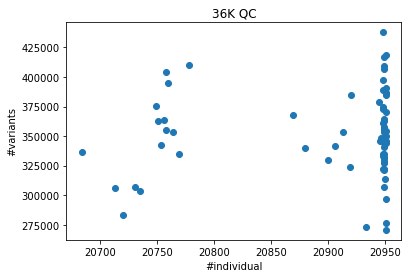

In [64]:
plt.scatter(counts[:,1], counts[:,0])
plt.xlabel("#individual")
plt.ylabel("#variants")
plt.title("36K QC")
plt.show()

In [67]:
print(min(counts[:,1]), max(counts[:,1]))

20684 20951


In [69]:
951-684

267

In [3]:
ind = pd.read_csv("/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_preview/plink_hg38_qc/ind_count.txt", header=None, sep=' ',names=["indv","counts"])

In [4]:
print(max(ind.counts), min(ind.counts))

39 1


<AxesSubplot:>

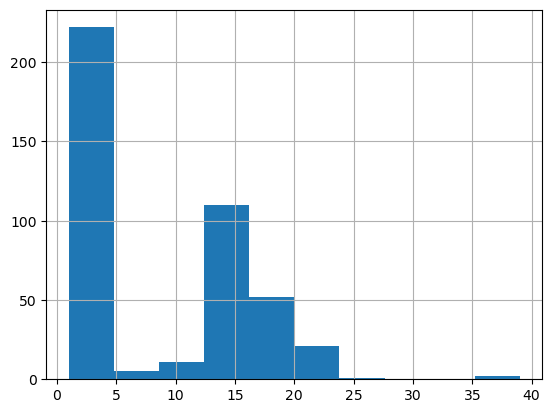

In [5]:
ind.counts.hist()

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


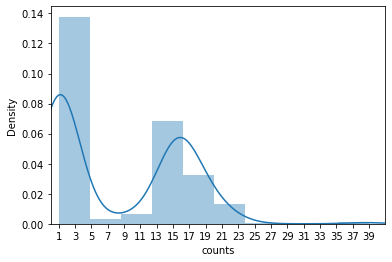

In [108]:
sns.distplot(ind.counts, hist=True, kde=True)
plt.xticks(list(range(1, 41,2)))
plt.xlim(0, 41)
plt.show()

(0.0, 40.0)

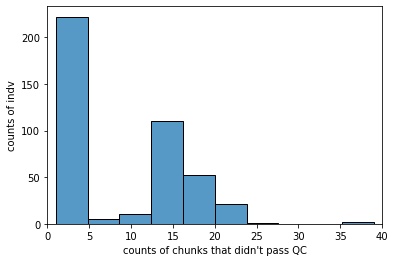

In [110]:
sns.histplot(ind.counts, stat='count')
plt.xlabel("counts of chunks that didn't pass QC")
plt.ylabel("counts of indv")
plt.xlim(0, 40)

In [7]:
## sum up all the vatiants that didnt pass QC per individual
## rerun Jun 21st,23

ind_var_count_file='/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_preview/plink_hg38_qc/processing_files/ind_missingvar_count.tsv'
var_count=pd.read_csv(ind_var_count_file, sep = ' ',header=None, names=["IID","COUNT","TOTAL"])
var_count = var_count.drop([20893])

<function matplotlib.pyplot.show(close=None, block=None)>

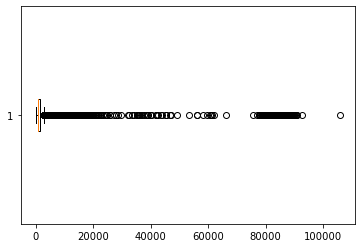

In [53]:
plt.boxplot(var_count.COUNT,vert=False)
plt.show

<AxesSubplot:xlabel='1', ylabel='Count'>

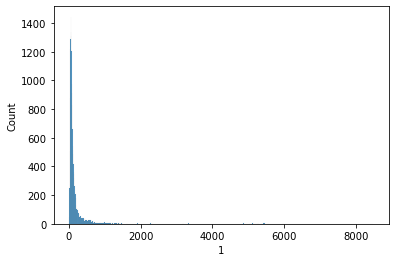

In [21]:
sns.histplot(var_count[1])

In [25]:
var_count[1].nlargest(10)

9579     8484
8206     7999
5249     7988
2035     7873
15242    7855
10107    7692
5329     7684
13454    7587
11057    7444
14058    7371
Name: 1, dtype: int64

In [8]:
var_count.sort_values(by = "COUNT", ascending=False).head(15)

,IID,COUNT,TOTAL
14058,A-NMAS-NM000730-BL-MIA-201103924,105991,19329914
9579,G-CCS-CC000169-BL-BYU-B2612,92569,14841307
17394,G-CCS-CC000094-BL-BYU-E6447,90809,14096046
20714,A-ACT-AC003421-BL-NCR-15AD77871,90538,17635737
8219,G-CCS-CC000052-BL-BYU-E6306,90516,13414708
2586,A-ADC-AD000332-BR-NCR-08AD11455,90232,13388223
7027,G-CCS-CC000202-BL-BYU-E6134,89915,14506216
13454,A-ADC-AD000163-BR-NCR-09AD14636,89758,15558069
4571,G-CCS-CC000115-BL-BYU-B2702,89656,14096046
4055,G-CCS-CC000075-BL-BYU-B1842,89491,14096046


In [9]:
var_count["rate"] = var_count.COUNT/var_count.TOTAL

In [24]:
var_count['rate_total_variant'] = var_count.rate * (19329914/var_count.TOTAL)

In [25]:
var_count.sort_values(by = "rate", ascending=False).head(15)

,IID,COUNT,TOTAL,rate,rate_total_variant
13735,G-CCS-CC000061-BL-BYU-B1335,81864,11259335,0.007271,0.012482
19476,G-CCS-CC000079-BL-BYU-E6578,81079,11251349,0.007206,0.012380
6445,G-CCS-CC000041-BL-BYU-B1173,77568,10897942,0.007118,0.012625
11448,G-CCS-CC000135-BL-BYU-E6897,85039,11984286,0.007096,0.011445
6807,G-CCS-CC000121-BL-BYU-E7069,87271,12343649,0.007070,0.011072
6637,G-CCS-CC000125-BL-BYU-E6750,81591,11605205,0.007031,0.011710
11458,G-CCS-CC000065-BL-BYU-B2643,89015,12661426,0.007030,0.010733
2592,G-CCS-CC000051-BL-BYU-B0527,85718,12326046,0.006954,0.010906
16233,G-CCS-CC000085-BL-BYU-E6260,82544,11920952,0.006924,0.011228
6979,G-CCS-CC000045-BL-BYU-B2131,85336,12326046,0.006923,0.010857


In [36]:
var_count.sort_values(by = "TOTAL").head(15)

,IID,COUNT,TOTAL,rate,rate_total_variant
7211,A-ADC-AD010868-BL-NCR-13AD60622,24188,5510154,0.004390,0.015399
4670,A-STEP-ST000184-BL-UON-N122,33649,5823612,0.005778,0.019179
6445,G-CCS-CC000041-BL-BYU-B1173,77568,10897942,0.007118,0.012625
19476,G-CCS-CC000079-BL-BYU-E6578,81079,11251349,0.007206,0.012380
13735,G-CCS-CC000061-BL-BYU-B1335,81864,11259335,0.007271,0.012482
6637,G-CCS-CC000125-BL-BYU-E6750,81591,11605205,0.007031,0.011710
16233,G-CCS-CC000085-BL-BYU-E6260,82544,11920952,0.006924,0.011228
18894,G-CCS-CC000162-BL-BYU-E6686,77776,11984286,0.006490,0.010468
110,G-CCS-CC000181-BL-BYU-B1005,77153,11984286,0.006438,0.010384
17242,G-CCS-CC000134-BL-BYU-E6898,81004,11984286,0.006759,0.010902


In [39]:
var_count.sort_values(by = "rate_total_variant",ascending=False).head(15)

,IID,COUNT,TOTAL,rate,rate_total_variant
4670,A-STEP-ST000184-BL-UON-N122,33649,5823612,0.005778,0.019179
7211,A-ADC-AD010868-BL-NCR-13AD60622,24188,5510154,0.004390,0.015399
6445,G-CCS-CC000041-BL-BYU-B1173,77568,10897942,0.007118,0.012625
13735,G-CCS-CC000061-BL-BYU-B1335,81864,11259335,0.007271,0.012482
19476,G-CCS-CC000079-BL-BYU-E6578,81079,11251349,0.007206,0.012380
6637,G-CCS-CC000125-BL-BYU-E6750,81591,11605205,0.007031,0.011710
11448,G-CCS-CC000135-BL-BYU-E6897,85039,11984286,0.007096,0.011445
16233,G-CCS-CC000085-BL-BYU-E6260,82544,11920952,0.006924,0.011228
6807,G-CCS-CC000121-BL-BYU-E7069,87271,12343649,0.007070,0.011072
2592,G-CCS-CC000051-BL-BYU-B0527,85718,12326046,0.006954,0.010906


In [ ]:
var_count.sort_values(by = "TOTAL").head(15)

In [32]:
var_count[var_count.TOTAL != 19329914].TOTAL

79       14096046
102      14096046
110      11984286
139      18313016
271      19000365
           ...   
20654    14096046
20697    13727801
20714    17635737
20749    19023935
20899    13388223
Name: TOTAL, Length: 423, dtype: int64